In [1]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [2]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [3]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        return np.sum(np.log(np.cosh(y1-y)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        return sum(np.log(1/np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [4]:
#gradient functions
def grad(X, y, h, err):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh(h-y))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [5]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [6]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [7]:
def mini_batch_maker(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.reshape(len(y),-1)))
    np.random.shuffle(data)
    i = 0
    for i in range(0, (math.floor(data.shape[0]/batch_size)) ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size , :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradient_descent(x, y,X_test,Y_test, order=3, batch_size=1, err=1, basis=0, tol = 10**-5, numIters = 1000, learningRate = 0.01):
    n = len(x)
    w = np.zeros((order + 1,1))           
    costs = []
    minicosts= []
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    for i in range(numIters):
        mini_batches = mini_batch_maker(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            h = hypothesis(X_mini[:,1], w, 0)
            w += -learningRate * grad(X_mini, y_mini, h, err)
            cost =error(X_mini[:,1], y_mini, w, err , 0)
            minicosts.append(cost)

    plt.figure(1)
    plt.scatter(x,y,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('For mini-batch size: '+ str(batch_size))
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot( minicosts)
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [8]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = gradient_descent(X_train, Y_train, X_test, Y_test, order,batch_size, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

mean_square_error
Calculating w by gradient descent
Polynomial Order:1
-4.95 + 21.21x^1
For mini-batch size: 5


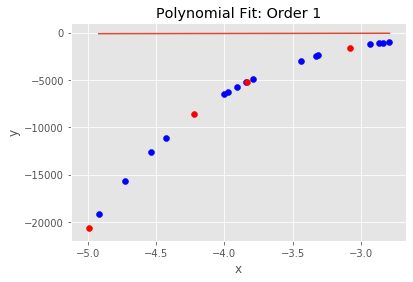

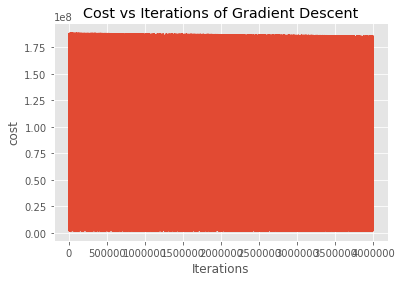

Training Cost: [3.66217163e+08 2.42720586e+08 1.57955731e+08 1.22088691e+08
 4.15000303e+07 3.83065972e+07 3.25635002e+07 2.68528706e+07
 2.33390148e+07 8.19574644e+06 5.74147884e+06 5.37511645e+06
 1.36329650e+06 1.07610291e+06 9.50001281e+05 7.71518945e+05]
Testing Cost: [4.24056163e+08 7.30631976e+07 2.60484656e+07 2.38803855e+06]
Noise: [4.24267621e+08 3.66168052e+08 2.42680606e+08 1.57923481e+08
 1.22060339e+08 7.31509850e+07 4.14835049e+07 3.82907207e+07
 3.25488630e+07 2.68395796e+07 2.61008924e+07 2.33266246e+07
 8.18840846e+06 5.73533878e+06 5.36917586e+06 2.40392872e+06
 1.36031004e+06 1.07345081e+06 9.47510075e+05 7.69275005e+05]
mean_square_error
Calculating w by gradient descent
Polynomial Order:2
-4.45 + 19.23x^1 + -84.41x^2
For mini-batch size: 5


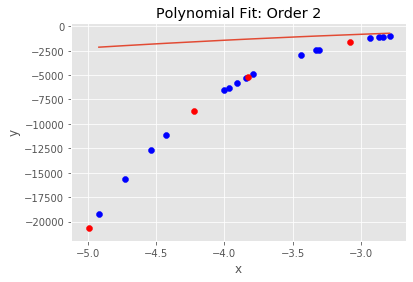

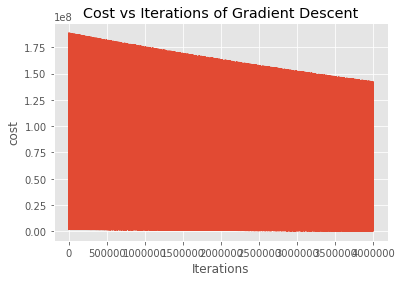

Training Cost: [3.21819636e+08 2.06881526e+08 1.29361864e+08 9.71485646e+07
 2.76445948e+07 2.50594167e+07 2.04778554e+07 1.60290385e+07
 1.33594788e+07 2.95156304e+06 1.62009637e+06 1.44069505e+06
 1.97732188e+05 2.23928749e+05 2.48627790e+05 3.01904040e+05]
Testing Cost: [3.68497608e+08 5.12892008e+07 1.39342999e+07 2.55002692e+05]
Noise: [3.74823508e+08 3.20358600e+08 2.05713492e+08 1.28441871e+08
 9.63536588e+07 5.36467247e+07 2.72291768e+07 2.46648225e+07
 2.01230267e+07 1.57174083e+07 1.51571682e+07 1.30767534e+07
 2.83095387e+06 1.53792664e+06 1.36492599e+06 3.05475289e+05
 2.16755798e+05 2.53681367e+05 2.83543115e+05 3.44753691e+05]
mean_square_error
Calculating w by gradient descent
Polynomial Order:3
-0.88 + 4.64x^1 + -23.39x^2 + 114.81x^3
For mini-batch size: 5


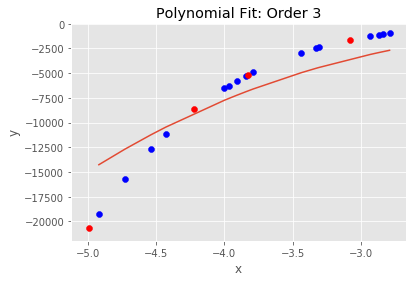

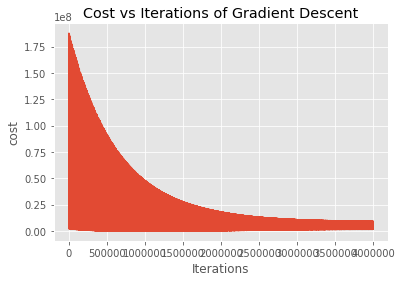

Training Cost: [1.64731551e+08 8.96180627e+07 4.58120372e+07 3.06004775e+07
 1.26762618e+07 1.29214417e+07 1.37447873e+07 1.51674911e+07
 1.64266457e+07 2.80534736e+07 3.19466719e+07 3.26372457e+07
 4.42784461e+07 4.57629230e+07 4.64893341e+07 4.76210392e+07]
Testing Cost: [1.63321586e+08 1.69600294e+07 2.84544207e+07 6.52492077e+07]
Noise: [1.95021837e+08 1.57801048e+08 8.51071066e+07 4.33493547e+07
 2.91707364e+07 1.58902703e+07 1.43802511e+07 1.47973896e+07
 1.59491105e+07 1.77285389e+07 1.80149144e+07 1.92263827e+07
 3.21919324e+07 3.64025554e+07 3.71459847e+07 4.51283041e+07
 4.95699630e+07 5.11430378e+07 5.19120814e+07 5.31093065e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:4
0.35 + -0.91x^1 + 1.81x^2 + -0.06x^3 + -29.27x^4
For mini-batch size: 5


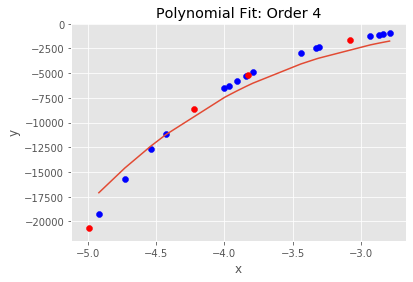

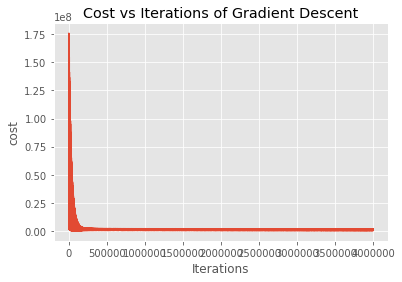

Training Cost: [1.76895819e+08 1.00836682e+08 5.62301152e+07 4.06148436e+07
 2.14658495e+07 2.16438216e+07 2.23388258e+07 2.36221085e+07
 2.47879745e+07 3.58915800e+07 3.96607169e+07 4.03306329e+07
 5.16658945e+07 5.31157440e+07 5.38254927e+07 5.49315902e+07]
Testing Cost: [1.68013892e+08 3.29177385e+07 4.76331837e+07 8.77561613e+07]
Noise: [2.06002682e+08 1.68744445e+08 9.59594022e+07 5.41245279e+07
 3.99070169e+07 2.65626479e+07 2.49985392e+07 2.54092030e+07
 2.65485598e+07 2.83145566e+07 2.85990936e+07 2.98034132e+07
 4.27185568e+07 4.69172281e+07 4.76586672e+07 5.56213513e+07
 6.00531720e+07 6.16229108e+07 6.23903493e+07 6.35851074e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:5
0.07 + -0.21x^1 + 0.59x^2 + -1.45x^3 + 2.09x^4 + 7.09x^5
For mini-batch size: 5


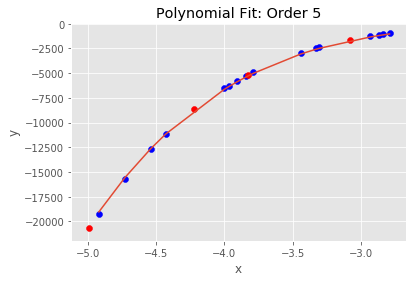

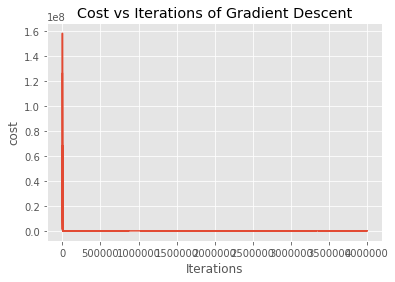

Training Cost: [1.95968300e+08 1.16599051e+08 6.91903004e+07 5.21618913e+07
 2.87257315e+07 2.86684522e+07 2.89142156e+07 2.97094737e+07
 3.05487959e+07 3.98209348e+07 4.31558121e+07 4.37534182e+07
 5.40177840e+07 5.53464253e+07 5.59978497e+07 5.70143111e+07]
Testing Cost: [1.84781916e+08 4.96184369e+07 6.43146323e+07 1.04417720e+08]
Noise: [2.25702774e+08 1.87354400e+08 1.11917291e+08 6.78373028e+07
 5.24875843e+07 3.72829347e+07 3.41442234e+07 3.43664034e+07
 3.51458278e+07 3.65208188e+07 3.67518345e+07 3.77480480e+07
 4.91958181e+07 5.30465599e+07 5.37300642e+07 6.11211463e+07
 6.52665658e+07 6.67391925e+07 6.74599014e+07 6.85828430e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:6
-0.01 + 0.05x^1 + -0.17x^2 + 0.58x^3 + -1.75x^4 + 3.98x^5 + -0.47x^6
For mini-batch size: 5


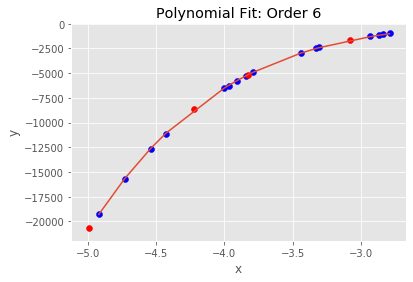

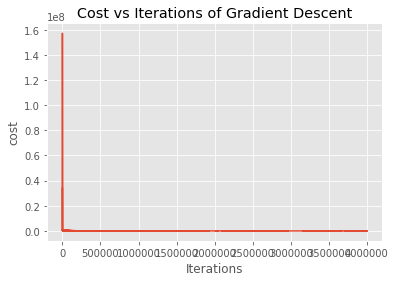

Training Cost: [1.97774641e+08 1.18080123e+08 7.03960152e+07 5.32287438e+07
 2.93713042e+07 2.92909078e+07 2.94925264e+07 3.02398287e+07
 3.10470629e+07 4.01392322e+07 4.34314368e+07 4.40219373e+07
 5.41810712e+07 5.54978019e+07 5.61434950e+07 5.71511484e+07]
Testing Cost: [1.86831525e+08 5.19012970e+07 6.66641846e+07 1.06836183e+08]
Noise: [2.27664731e+08 1.89215058e+08 1.13531511e+08 6.92429007e+07
 5.37879741e+07 3.84104617e+07 3.51254337e+07 3.53300992e+07
 3.60760776e+07 3.74147352e+07 3.76407775e+07 3.86176532e+07
 4.99290706e+07 5.37474818e+07 5.44256026e+07 6.17635697e+07
 6.58823760e+07 6.73459787e+07 6.80623453e+07 6.91786136e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:7
-0.01 + 0.03x^1 + -0.08x^2 + 0.22x^3 + -0.56x^4 + 1.24x^5 + -1.99x^6 + -0.19x^7
For mini-batch size: 5


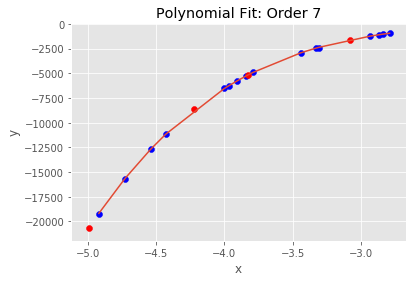

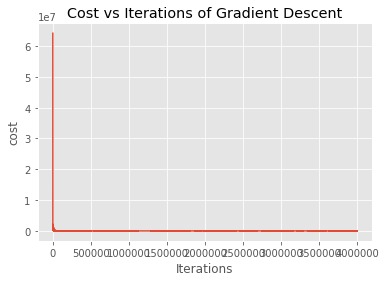

Training Cost: [1.98501376e+08 1.18669301e+08 7.08687432e+07 5.36427465e+07
 2.96071466e+07 2.95169739e+07 2.96999235e+07 3.04269451e+07
 3.12206093e+07 4.02366689e+07 4.35108271e+07 4.40983226e+07
 5.42129536e+07 5.55246474e+07 5.61679167e+07 5.71718451e+07]
Testing Cost: [1.87080573e+08 5.11531972e+07 6.56309759e+07 1.05508382e+08]
Noise: [2.28341163e+08 1.89822045e+08 1.13969553e+08 6.95379223e+07
 5.40108707e+07 3.85148527e+07 3.51295178e+07 3.53221763e+07
 3.60452259e+07 3.73589752e+07 3.75816080e+07 3.85452268e+07
 4.97631680e+07 5.35594150e+07 5.42338452e+07 6.15353996e+07
 6.56359612e+07 6.70933776e+07 6.78067674e+07 6.89184607e+07]


In [9]:
for i in range(1,8):
    main_f(i,1,20,5,1000000,10**-5, 0.0000000001,0)

mean_square_error
Calculating w by gradient descent
Polynomial Order:1
-7.40 + 31.72x^1
For mini-batch size: 3


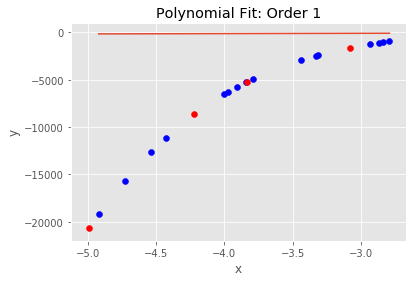

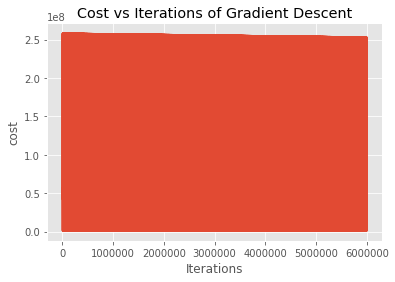

Training Cost: [3.64626263e+08 2.41425785e+08 1.56911593e+08 1.21170962e+08
 4.09657999e+07 3.77934107e+07 3.20904995e+07 2.64235250e+07
 2.29388795e+07 7.95944074e+06 5.54401884e+06 5.18412477e+06
 1.26809937e+06 9.91748182e+05 8.70863829e+05 7.00399678e+05]
Testing Cost: [4.22213458e+08 7.22996466e+07 2.55934711e+07 2.25186358e+06]
Noise: [4.22528991e+08 3.64552992e+08 2.41366168e+08 1.56863535e+08
 1.21128734e+08 7.24302491e+07 4.09412561e+07 3.77698373e+07
 3.20687793e+07 2.64038178e+07 2.56711975e+07 2.29205193e+07
 7.94863537e+06 5.53500479e+06 5.17540900e+06 2.27495508e+06
 1.26380103e+06 9.87949830e+05 8.67306065e+05 6.97211662e+05]
mean_square_error
Calculating w by gradient descent
Polynomial Order:2
-6.32 + 27.42x^1 + -120.81x^2
For mini-batch size: 3


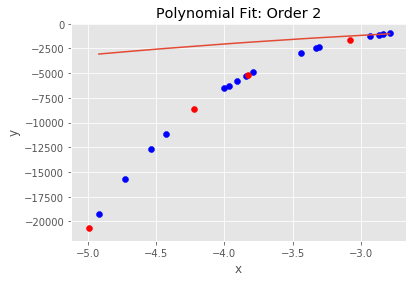

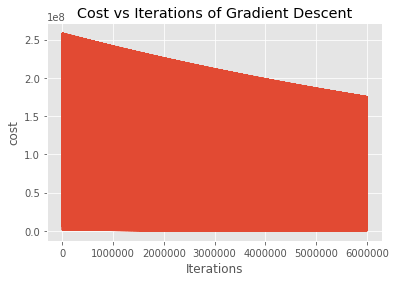

Training Cost: [3.02438956e+08 1.91447021e+08 1.17268003e+08 8.67393859e+07
 2.23463927e+07 2.00416714e+07 1.59956759e+07 1.21286611e+07
 9.84839302e+06 1.62387388e+06 8.10113063e+05 7.16916548e+05
 7.50630142e+05 9.21325973e+05 1.01555683e+06 1.17569332e+06]
Testing Cost: [3.44462013e+08 4.27540378e+07 9.83108966e+06 7.31157820e+05]
Noise: [3.53214178e+08 3.00423284e+08 1.89850685e+08 1.16026657e+08
 8.56770610e+07 4.58267710e+07 2.18271805e+07 1.95522617e+07
 1.55631775e+07 1.17579873e+07 1.12799344e+07 9.51908691e+06
 1.52658417e+06 7.67836832e+05 6.83800783e+05 5.02101358e+05
 8.53179091e+05 1.03922999e+06 1.14084957e+06 1.31234145e+06]
mean_square_error
Calculating w by gradient descent
Polynomial Order:3
-0.57 + 3.93x^1 + -22.40x^2 + 118.21x^3
For mini-batch size: 3


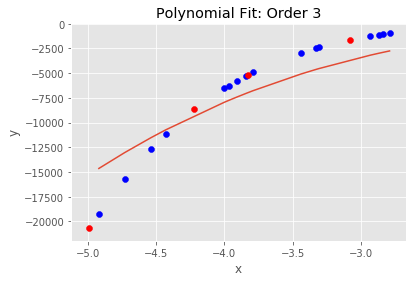

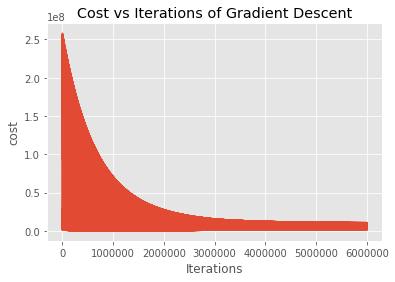

Training Cost: [1.61098080e+08 8.72398592e+07 4.44964830e+07 2.98208158e+07
 1.35223870e+07 1.38567794e+07 1.48504869e+07 1.64582602e+07
 1.78412474e+07 3.01626074e+07 3.42204864e+07 3.49384817e+07
 4.69857891e+07 4.85162309e+07 4.92647598e+07 5.04304569e+07]
Testing Cost: [1.58921176e+08 1.79218649e+07 3.09494533e+07 6.93284337e+07]
Noise: [1.90822195e+08 1.54144384e+08 8.27713894e+07 4.21318886e+07
 2.85172027e+07 1.61633092e+07 1.54375716e+07 1.59485905e+07
 1.72795873e+07 1.92537687e+07 1.95668022e+07 2.08819244e+07
 3.45783468e+07 3.89622673e+07 3.97345528e+07 4.80015770e+07
 5.25858872e+07 5.42073319e+07 5.49996507e+07 5.62326463e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:4
0.56 + -1.50x^1 + 3.36x^2 + -3.08x^3 + -30.05x^4
For mini-batch size: 3


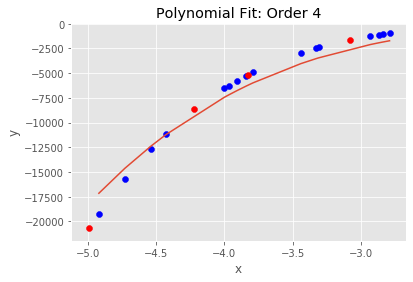

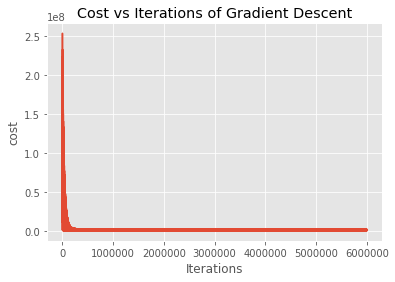

Training Cost: [1.77539089e+08 1.01363346e+08 5.66580655e+07 4.09930128e+07
 2.16929932e+07 2.18626780e+07 2.25418567e+07 2.38079475e+07
 2.49623102e+07 3.60013981e+07 3.97552371e+07 4.04226058e+07
 5.17201426e+07 5.31657223e+07 5.38734164e+07 5.49763562e+07]
Testing Cost: [1.68511007e+08 3.33605251e+07 4.80604367e+07 8.81673641e+07]
Noise: [2.06655066e+08 1.69357165e+08 9.64756281e+07 5.45590664e+07
 4.03003606e+07 2.68883061e+07 2.52669062e+07 2.56707121e+07
 2.67969729e+07 2.85487432e+07 2.88313328e+07 3.00280806e+07
 4.28898346e+07 4.70758465e+07 4.78151777e+07 5.57570644e+07
 6.01784645e+07 6.17446700e+07 6.25104082e+07 6.37025533e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:5
0.09 + -0.27x^1 + 0.76x^2 + -1.90x^3 + 2.99x^4 + 7.32x^5
For mini-batch size: 3


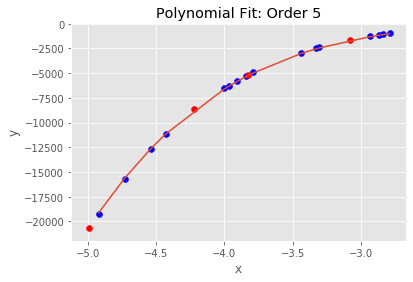

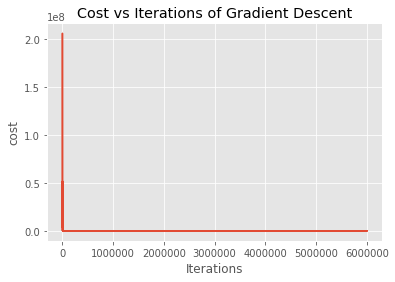

Training Cost: [1.96752802e+08 1.17241501e+08 6.97124957e+07 5.26234425e+07
 2.90033007e+07 2.89359256e+07 2.91624100e+07 2.99367248e+07
 3.07620334e+07 3.99555757e+07 4.32718168e+07 4.38663198e+07
 5.40847285e+07 5.54081682e+07 5.60570896e+07 5.70697044e+07]
Testing Cost: [1.85515403e+08 5.02458276e+07 6.49116875e+07 1.04983430e+08]
Noise: [2.26523786e+08 1.88126123e+08 1.12569105e+08 6.83876085e+07
 5.29866992e+07 3.76979402e+07 3.44880361e+07 3.47016941e+07
 3.54648448e+07 3.68221571e+07 3.70507529e+07 3.80375573e+07
 4.94189826e+07 5.32539934e+07 5.39348783e+07 6.13001164e+07
 6.54325868e+07 6.69008227e+07 6.76194188e+07 6.87391134e+07]
mean_square_error
Calculating w by gradient descent
Polynomial Order:6


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/aarushigupta/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-17bbc92e15de>", line 2, in <module>
    main_f(i,1,20,3,1000000,10**-5, 0.0000000001,0)
  File "<ipython-input-8-b1d4ceca70c0>", line 46, in main_f
    w = gradient_descent(X_train, Y_train, X_test, Y_test, order,batch_size, err, 0, tol, numIters, learningRate)
  File "<ipython-input-7-c3a5c3b96a1e>", line 33, in gradient_descent
    cost =error(X_mini[:,1], y_mini, w, err , 0)
  File "<ipython-input-3-ddde917edd30>", line 4, in error
    y1 = hypothesis(X,w,j)
  File "<ipython-input-2-5de76691409e>", line 5, in hypothesis
    X[i] = x ** (i)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aarushigupta/opt/anaconda3/lib/python3.7/site-packages/IPython/core/in

KeyboardInterrupt: 

In [10]:
for i in range(1,8):
    main_f(i,1,20,3,1000000,10**-5, 0.0000000001,0)

In [ ]:
for i in range(1,8):
    main_f(i,1,20,1,1000000,10**-5, 0.0000000001,0)